## Starting the project `Heart Disease Prediction Classification`

In [7]:
# import all the need libraries

# Regular EDA (Exploratory Data Analysis) and visualizing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# import models using the sklearn (LogisticRegression, KNeighbourslassifier, RandomForestlassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Loading the Data

In [10]:
df = pd.read_csv("/Users/abhishekchauhan/Learnings/Machine-learning-course/Data/heart-disease.csv")
df.shape #(row,column)

(303, 14)


## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with.

1. What questions are you trying to solve.
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data.

In [11]:
# checking the head of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# checking the tail of the data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# we are going to work with the target column so lets check the value count
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

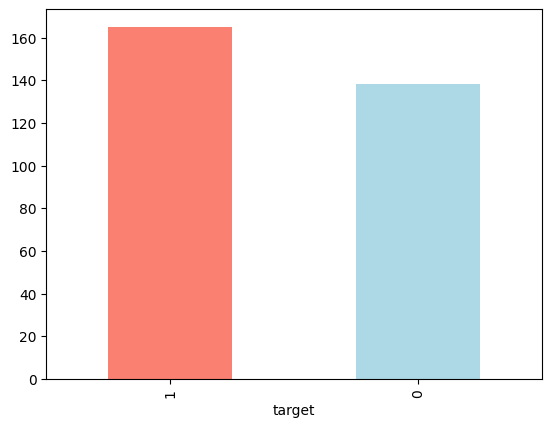

In [22]:
# Lets visualize this.
df["target"].value_counts().plot(kind='bar',color=["Salmon","lightblue"]);

In [23]:
# Lets check the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
# do our data has missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
# lets check even more information about our data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to the gender

In [29]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [30]:
# compare the target column with the sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


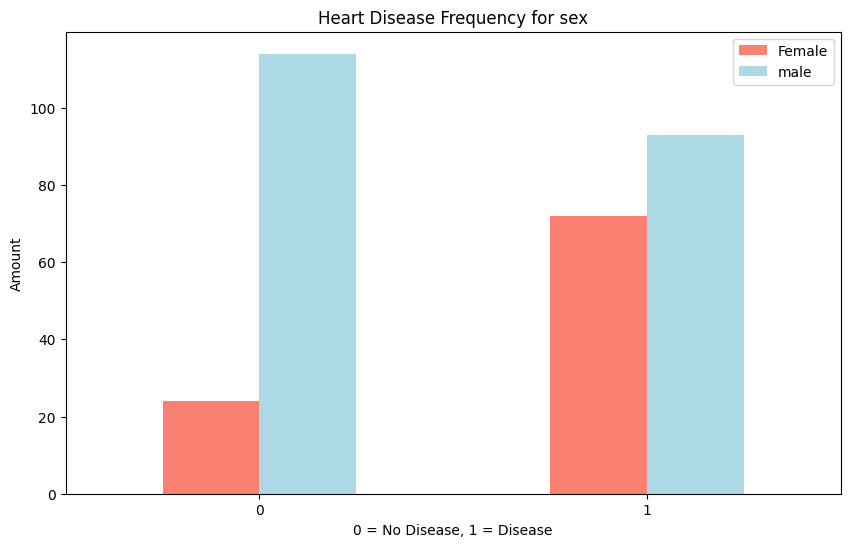

In [36]:
# Lets plot the graph for this
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title('Heart Disease Frequency for sex')
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","male"])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for the heart disease

In [37]:
# plot scatter chat for the positive outcomes.
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

We are going to use the thalach column for this task it shows Max Heart Rate.

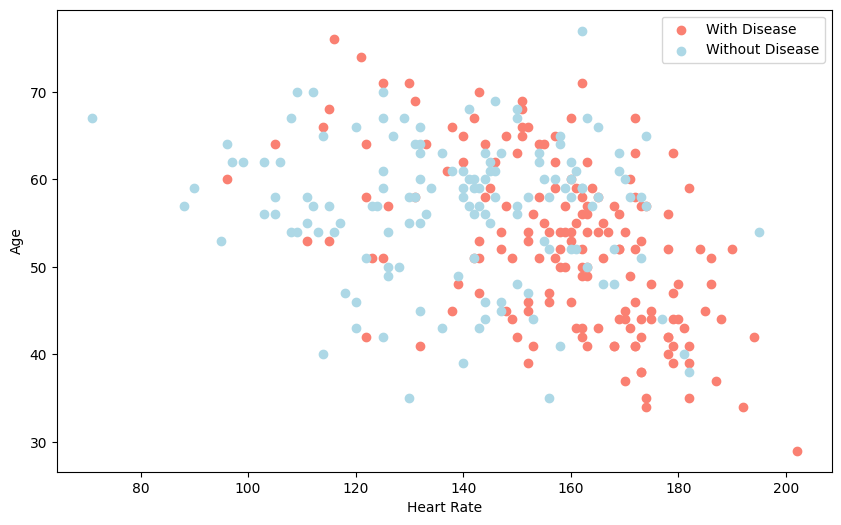

In [45]:
# starting the ploting part
plt.figure(figsize=(10,6))
# ploting the scatter chart
plt.scatter(df.thalach[df.target == 1],df.age[df.target==1],color= ('salmon'))
plt.xlabel('Heart Rate')
plt.ylabel('Age')

# Scatter plot with negative examples

plt.scatter(df.thalach[df.target == 0],df.age[df.target == 0],color = "lightblue")
plt.legend(["With Disease","Without Disease"])

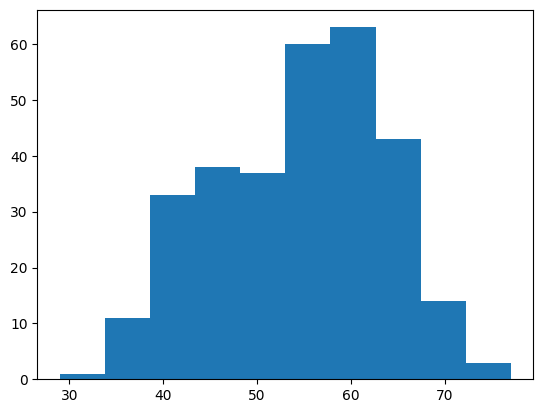

In [49]:
# Checking the data Distribution of the Age column.
plt.hist(df.age);

## Heart Disease Frequency as per chest Pain Type

In [50]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

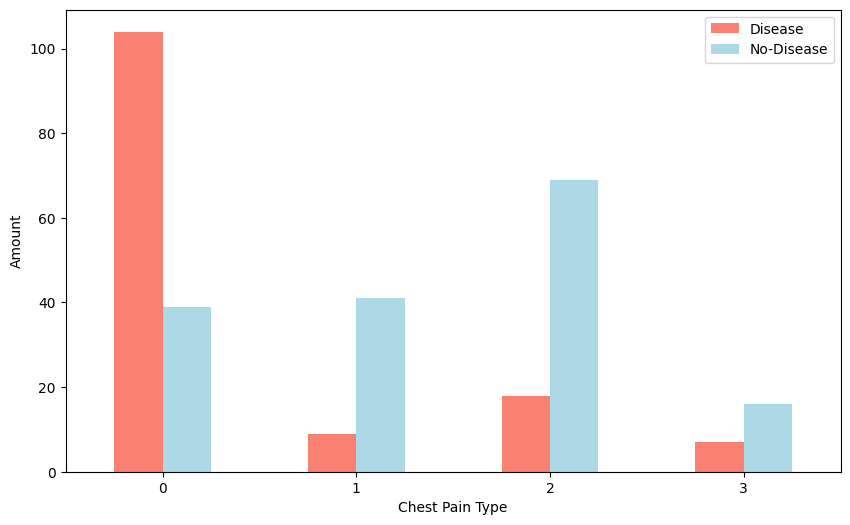

In [62]:
# making this data more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",color= ["Salmon","Lightblue"],figsize=(10,6))
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease","No-Disease"])
plt.xticks(rotation = 0)

In [63]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


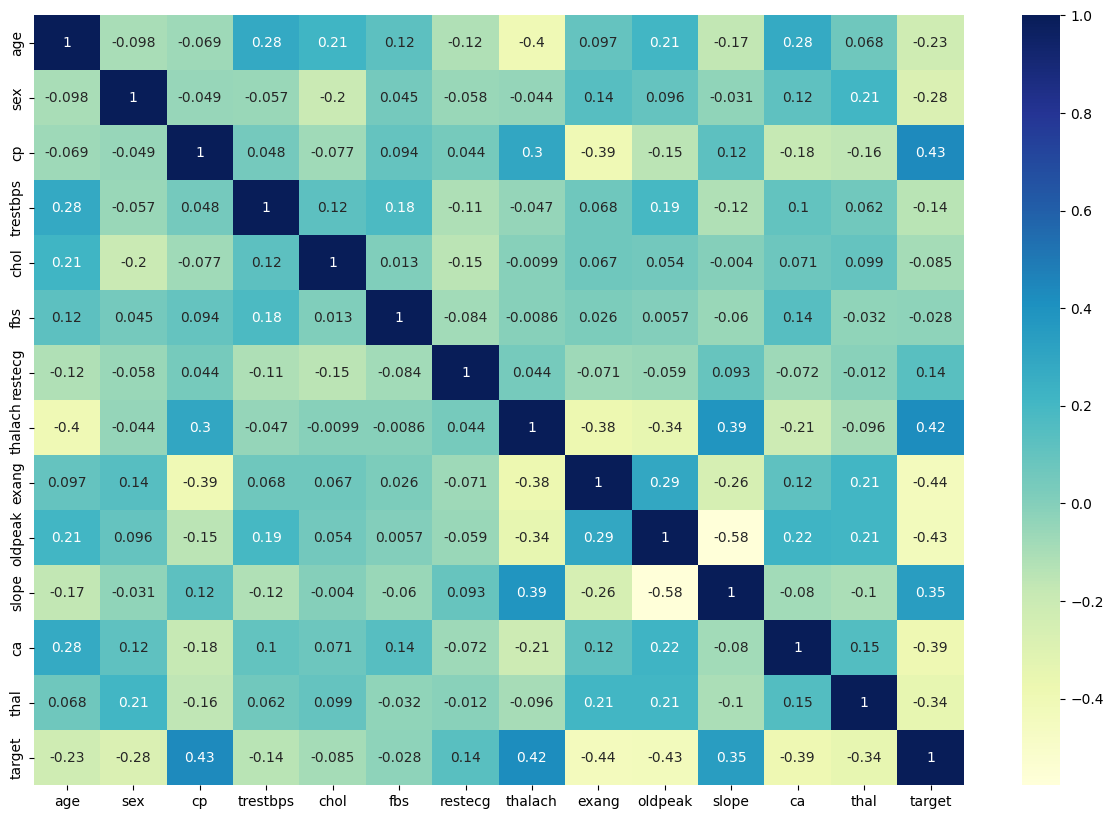

In [70]:
# lets visualize this using the sns

corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')


## Modeling

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split the data in test and train
from sklearn.model_selection import train_test_split

# dividing data in train and test
x = df.drop('target',axis=1)
y = df['target']

# fixing the state 
np.random.seed(42)

# spliting the data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



In [74]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2


In [75]:
y_train

234    0
74     1
299    0
54     1
108    1
      ..
90     1
183    0
103    1
266    0
192    0
Name: target, Length: 242, dtype: int64

In [78]:
# Put the model in the dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
# create a function to fit model and score model.

def fit_and_score(models,X_train,X_test,Y_train,Y_test):

    """
    Fit and evalate the give models in the dictionary
    * models : a dictionary of different SK-learn Machine learning models
    * X_train : train data without the target column
    * X_test : test data without the target column
    * Y_train : train data only traget column
    * Y_test : test data only target column
    """

    # set Random Seed
    np.random.seed(42)

    # Make empty dictionary to keep models score.
    model_score = {}

    # Loop thorugh models
    for name,model in models.items():

        # Fit the model to the data 
        model.fit(X_train,Y_train)

        # Evaluate the model and append its score in the dictionary 
        model_score[name] = model.score(X_test,Y_test)

    return model_score




In [79]:
model_scores = fit_and_score(models = models,
                             X_train= x_train,
                             X_test= x_test,
                             Y_train= y_train,
                             Y_test= y_test
                             )
model_scores

/Users/abhishekchauhan/Learnings/Machine-learning-course/heart disease project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8032786885245902}

## Model Comparison

<Axes: >

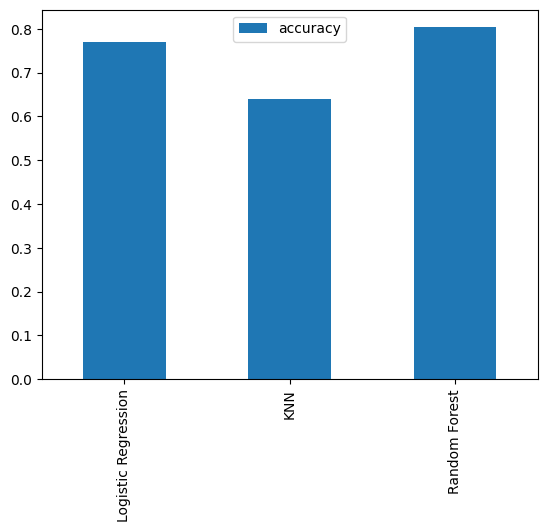

In [95]:
# changing the data in the DataFrame
model_comparison = pd.DataFrame(model_scores,index=["accuracy"])

# plotting the graph

# # sns
# fig,ax = plt.subplots(figsize = (10,8))
# ax = sns.barplot(model_comparison,color = "lightblue")


model_comparison.T.plot(kind='bar')


## Hyperparameter tuning

In [97]:
# Let's tune KNN
# create empty list
train_score = []
test_score = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # fit the algorithm 
    knn.fit(x_train,y_train)
    # update the training score list
    train_score.append(knn.score(x_train,y_train))

    # Update the test score list
    test_score.append(knn.score(x_test,y_test))



In [99]:
train_score


[1.0,
 0.7933884297520661,
 0.8099173553719008,
 0.78099173553719,
 0.7933884297520661,
 0.7644628099173554,
 0.7644628099173554,
 0.7355371900826446,
 0.731404958677686,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.7148760330578512,
 0.7024793388429752,
 0.7066115702479339,
 0.6900826446280992,
 0.7024793388429752,
 0.6942148760330579,
 0.6983471074380165,
 0.6942148760330579]

In [100]:
test_score

[0.5573770491803278,
 0.5245901639344263,
 0.5901639344262295,
 0.5573770491803278,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.5409836065573771,
 0.6065573770491803,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.5901639344262295,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082]

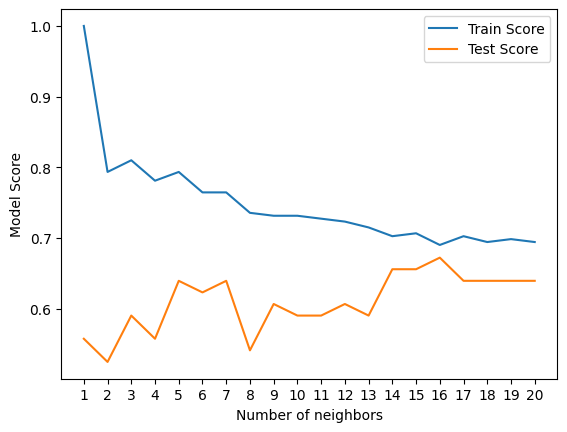

In [104]:
plt.plot(neighbors,train_score,label="Train Score")
plt.plot(neighbors,test_score,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()